In [1]:
%matplotlib inline
import os
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import cPickle as Pickle

In [10]:
os.chdir('/home/wryang/CApest/')
constrfile = open('constr.txt', 'r')
constr = constrfile.readline().strip()
consrtffile.close()

In [36]:
lst01 = ['Methyl bromide', '1,3-Dichloropropene', 'Chloropicrin', 
        'Metam sodium', 'Metam potassium', 'dazomet']
def plot_lm_one(data, *args):
    fig = plt.figure(figsize = (8, 5))
    ax = plt.subplot(111)
    print 'input chem names', args[0]
    for k, item in enumerate(args[0]):
        subdf = None
        subdf = data[data.chem==item]
        if len(subdf.year) != len(range(1990, 2016)):
            missing_years = list(set(data.year) - set(subdf.year))
            temp = pd.DataFrame({'year': missing_years, 
                     'chem':[item]*len(missing_years), 
                     'kg':[0]*len(missing_years)})
            subdf = pd.concat([subdf, temp])
            subdf = subdf.sort_values(by='year', axis=0)
        ax.plot(subdf.year, subdf.kg, color = np.random.rand(3,1), label=item)
    plt.title('Direct sum from all pur data')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
    plt.show()

# This part is the direct sum from all pur data

In [11]:
conn = psycopg2.connect(constr)
cur = conn.cursor()

In [12]:
cur.execute("""SELECT * FROM lynn.udc_direct_all""")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['year', 'chem', 'kg'])
conn.close()

In [13]:
print 'unique chem group', np.unique(df.chem)

unique chem group ['1,3-Dichloropropene' '2-4-Dichloropropene' 'Aldicarb' 'Benomyl'
 'Bromacil' 'Bromoxynil octanoate' 'Cacodylic acid' 'Capten' 'Carbaryl'
 'Carbofuran' 'Chloropicrin' 'Chlorothalonil' 'Chlorpyrifos' 'Diuron'
 'EPTC' 'Iprodione' 'Mancozeb' 'Maneb' 'Metam potassium' 'Metam sodium'
 'Metam-sodium' 'Methomyl' 'Methyl bromide' 'Molinate' 'Myclobutanil'
 'Norflurazon' 'OP' 'Prometon' 'Propargite' 'Simazine' 'Thiobencarb'
 'Trifluralin' 'dazomet' 'glyphoshpate']


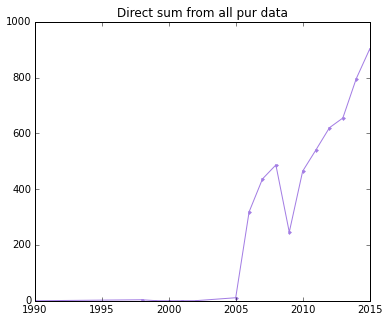

In [20]:
plt.figure(figsize = (6, 5))
glyphosphate = df[df.chem=='glyphoshpate']
plt.plot(glyphosphate.year, glyphosphate.kg, marker='.', color = np.random.rand(3,1))
plt.title("Direct sum from all pur data")

input chem names ['Methyl bromide', '1,3-Dichloropropene', 'Chloropicrin', 'Metam sodium', 'Metam potassium', 'dazomet']


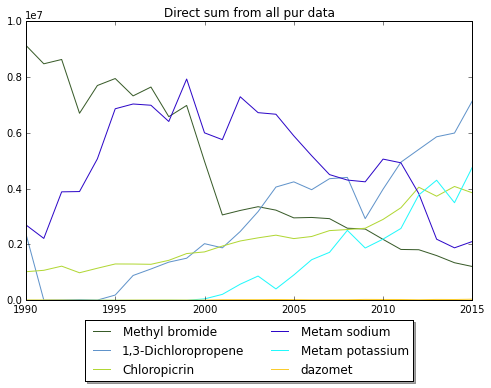

In [39]:
plot_lm_one(df, lst01)